# Compare Throughputs

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 12th 2023
- last update : February 13th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE=20230118

In [19]:
filenames = [
"throughput-2023-01-18-OG550_65mm_1~holo4_003-psf2dffm-rebin2-fitatmparams.csv",
"throughput-2023-01-18-empty~holo4_003-psf2dffm-rebin1-fitatmparams.csv",
"throughput-2023-01-18-empty~holo4_003-psf2dffm-rebin2-fitatmparams.csv"
]
tags = ["OG550_65mm_1 - psf2dffm-rebin2 ", "No Filter psf2dffm-rebin1","No Filter psf2dffm-rebin2" ]

In [7]:
all_df = []
for filename in filenames:
    all_df.append(pd.read_csv(filename))

In [8]:
NF =len(all_df)

In [9]:
all_df[0].head()

,Unnamed: 0,wavelength,newthrou,newthrouerr,oldthrou
0,0,500.0,0.000001,0.000046,0.000002
1,1,501.0,0.000001,0.000046,0.000002
2,2,502.0,0.000001,0.000046,0.000002
3,3,503.0,0.000001,0.000046,0.000002
4,4,504.0,0.000001,0.000046,0.000002


In [10]:
hls_colors = sns.color_palette("hls", NF)

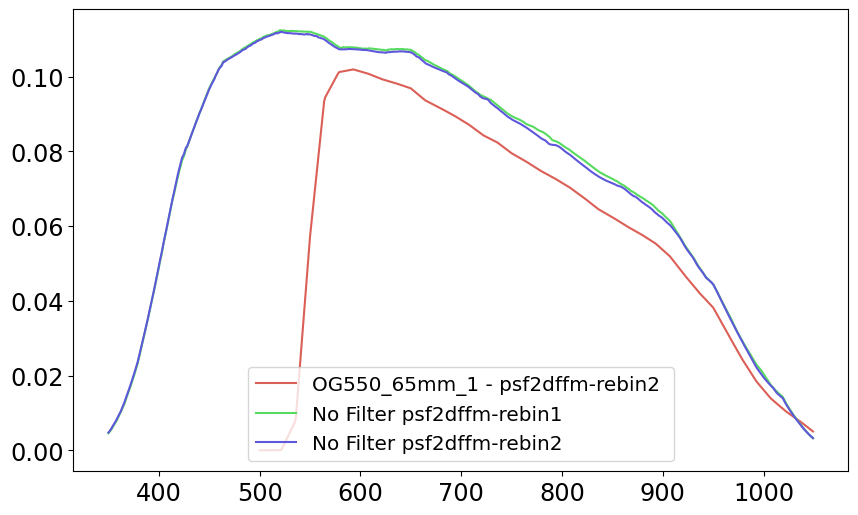

In [20]:
for ii in range(NF):
    the_df = all_df[ii]
    plt.plot(the_df["wavelength"],the_df["newthrou"],'-',color=hls_colors[ii],label=tags[ii])
    
plt.legend()
    

Text(0.5, 0, '$\\lambda$  (nm)')

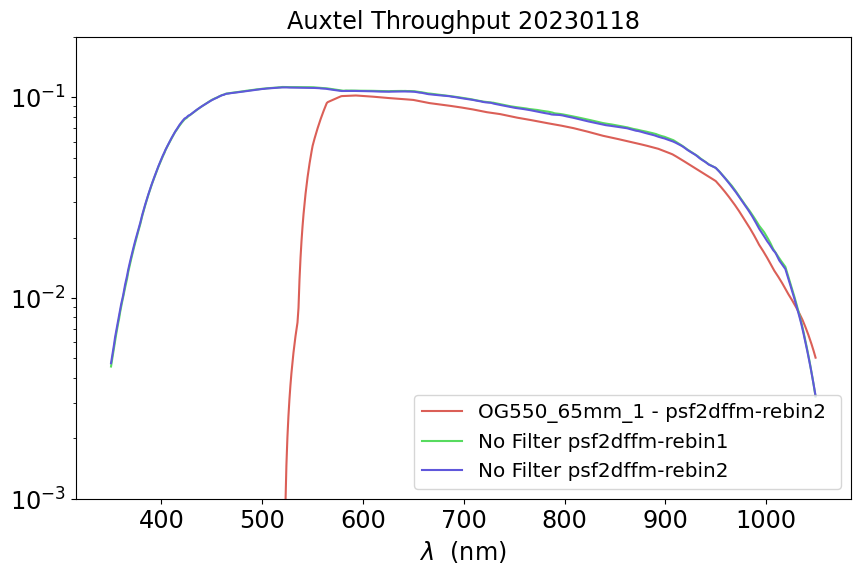

In [21]:
for ii in range(NF):
    the_df = all_df[ii]
    plt.plot(the_df["wavelength"],the_df["newthrou"],'-',color=hls_colors[ii],label=tags[ii])
    
plt.yscale('log')
plt.ylim(1e-3,0.2)
plt.legend()
plt.title(f"Auxtel Throughput {DATE}")
plt.xlabel("$\lambda$  (nm)")
  